# Широкие и длинные данные

Существует два фундаментальных подхода к хранению табличных данных: [широкие и длинные данные](https://en.wikipedia.org/wiki/Wide_and_narrow_data).

Объяснить их отдичие проще на примере. На изображении вы можете видеть две таблицы, которые представляют одну и ту же информацию — только в двух разных форматах:

![wide_long_tables](images/wide_long_tables.png)

* В обеих таблицах указаны характеристики трех учеников (Боба, Алисы и Стива).

* В обоих типах у вас есть столбец с именем Person. Это также называется столбцом идентификатора, потому что он содержит значения, которые не повторяются.

* В широком формате другие столбцы представляют различные классы (Age, Weight).

* В длинном формате есть только два дополнительных столбца: один содержит ключи (здесь: Variable), другой содержит значения (здесь: Value).

Вы можете сразу понять, почему длинный формат имеет свое название — в нем значительно больше строк, чем в широком формате. Кроме того, идентификаторы (здесь: Person) повторяются, в то время как идентификаторы в широком формате отображаются только один раз.

## Почему существует необходимость в двух разных форматах?

Широкие данные легче понять людям. Это тот тип представления данных, который часто используется при хранении таблиц в Excel (сводные таблицы). 

Однако у такого представления данных есть свои недостатки. Самое главное, что данными легче манипулировать в длинном формате.

Рассмотрим преобразование широких таблиц в длинные и обратно на примере температурных данных:

Подключим пакет `pandas` для работы с таблицами:

In [1]:
import pandas as pd

Считаем широкую таблицу по ссылке:

In [2]:
wide_temp = pd.read_csv('https://raw.githubusercontent.com/mikewellmeansme/biological-statistics-course/master/data/wide_temperature.csv')

Посмотрим на то, как выглядят наши данные:

In [3]:
wide_temp

,Month,Day,1944,1945,1946,1947,1948,1949,1950,1951,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1,NaN,-20.5,-31.0,-33.5,-37.0,-39.6,-21.4,-39.2,...,-27.6,-28.9,-31.3,-33.0,-30.9,-23.2,-37.7,-24.7,-19.4,-35.8
1,1,2,NaN,-22.0,-31.2,-33.4,-32.2,-37.8,-23.0,-37.7,...,-28.4,-29.2,-35.8,-31.4,-28.1,-23.6,-36.6,-26.8,-20.3,-29.9
2,1,3,NaN,-23.3,-34.0,-35.8,-26.8,-40.8,-26.1,-42.3,...,-31.5,-33.6,-39.5,-36.0,-22.1,-22.2,-36.5,-30.4,-23.7,-31.3
3,1,4,NaN,-32.3,-41.1,-38.6,-32.2,-37.3,-21.8,-40.4,...,-36.8,-32.6,-31.7,-40.3,-33.6,-27.1,-37.6,-32.6,-26.5,-28.4
4,1,5,NaN,-39.2,-33.4,-32.8,-35.0,-28.8,-27.2,-40.0,...,-36.8,-37.9,-33.5,-38.8,-29.3,-31.6,-35.1,-34.1,-32.2,-28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,-22.1,-38.7,-43.5,-40.6,-43.9,-26.1,-25.0,-38.7,...,-37.5,-27.8,-37.9,-39.5,-41.2,-29.4,-28.9,-32.0,-26.9,NaN
362,12,28,-25.0,-39.0,-41.0,-37.0,-41.4,-19.1,-31.7,-35.0,...,-39.5,-27.3,-29.9,-38.3,-38.4,-33.2,-30.1,-34.4,-29.8,NaN
363,12,29,-19.9,-32.4,-44.6,-41.2,-35.2,-18.3,-36.2,-35.2,...,-31.8,-30.0,-30.2,-36.0,-35.9,-28.9,-31.2,-36.3,-38.2,NaN
364,12,30,-27.5,-32.5,-44.0,-40.7,-36.9,-23.6,-38.9,-35.8,...,-28.1,-35.3,-25.7,-37.0,-34.0,-28.4,-31.5,-32.7,-38.3,NaN


Видим, что у нас имеется два столбца-идентефикатора: `Month` и `Day`, и множество столбцов для каждого года. В таком формате человеку проще и быстрее выбрать данные по температуре конкретного года в конкретный день. Однако чтобы добавить новые данные, нам придётся создать новую колонку (то есть, изменить структуру таблицы, что не всегда хорошо).

Препобразование широкой таблицы в длинную осуществляется при помощи метода `df.melt(id_vars, var_name, value_name)`, где:

* id_vars — все столбцы которые следует игнорировать в процессе преобразования. Эти столбцы идентифицируют наблюдение

* var_name — новое имя, представляющее преобразуемые столбцы

* value_name — имя нового столбца, в котором будут храниться значения

Преобразуем широкую таблицу в длинную:

In [4]:
long_temp = wide_temp.melt(
    id_vars=['Month', 'Day'],
    var_name='Year',
    value_name='Temperature'
)

Посмотрим на получившуюся таблицу:

In [5]:
long_temp

,Month,Day,Year,Temperature
0,1,1,1944,NaN
1,1,2,1944,NaN
2,1,3,1944,NaN
3,1,4,1944,NaN
4,1,5,1944,NaN
...,...,...,...,...
28177,12,27,2020,NaN
28178,12,28,2020,NaN
28179,12,29,2020,NaN
28180,12,30,2020,NaN


Как мы видим, теперь у нас всего 4 колонки, зато 28 тысяч строк

Преобразование длинной таблицы в широкую осуществляется при помощи метода `df.pivot(index, columns, values)`, где:

* index — имя столбца идентификатора

* columns — имена столбцов, из которых будут извлечены новые имена столбцов

* values — имя столбца, которое используется для заполнения значений в новых столбцах

In [6]:
long_temp.pivot(
    index = ['Month', 'Day'],
    columns = 'Year',
    values = 'Temperature'
).reset_index()

Year,Month,Day,1944,1945,1946,1947,1948,1949,1950,1951,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1,NaN,-20.5,-31.0,-33.5,-37.0,-39.6,-21.4,-39.2,...,-27.6,-28.9,-31.3,-33.0,-30.9,-23.2,-37.7,-24.7,-19.4,-35.8
1,1,2,NaN,-22.0,-31.2,-33.4,-32.2,-37.8,-23.0,-37.7,...,-28.4,-29.2,-35.8,-31.4,-28.1,-23.6,-36.6,-26.8,-20.3,-29.9
2,1,3,NaN,-23.3,-34.0,-35.8,-26.8,-40.8,-26.1,-42.3,...,-31.5,-33.6,-39.5,-36.0,-22.1,-22.2,-36.5,-30.4,-23.7,-31.3
3,1,4,NaN,-32.3,-41.1,-38.6,-32.2,-37.3,-21.8,-40.4,...,-36.8,-32.6,-31.7,-40.3,-33.6,-27.1,-37.6,-32.6,-26.5,-28.4
4,1,5,NaN,-39.2,-33.4,-32.8,-35.0,-28.8,-27.2,-40.0,...,-36.8,-37.9,-33.5,-38.8,-29.3,-31.6,-35.1,-34.1,-32.2,-28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,-22.1,-38.7,-43.5,-40.6,-43.9,-26.1,-25.0,-38.7,...,-37.5,-27.8,-37.9,-39.5,-41.2,-29.4,-28.9,-32.0,-26.9,NaN
362,12,28,-25.0,-39.0,-41.0,-37.0,-41.4,-19.1,-31.7,-35.0,...,-39.5,-27.3,-29.9,-38.3,-38.4,-33.2,-30.1,-34.4,-29.8,NaN
363,12,29,-19.9,-32.4,-44.6,-41.2,-35.2,-18.3,-36.2,-35.2,...,-31.8,-30.0,-30.2,-36.0,-35.9,-28.9,-31.2,-36.3,-38.2,NaN
364,12,30,-27.5,-32.5,-44.0,-40.7,-36.9,-23.6,-38.9,-35.8,...,-28.1,-35.3,-25.7,-37.0,-34.0,-28.4,-31.5,-32.7,-38.3,NaN


## Почему с данными легче работать в длинном формате?

Предположим, мы хотим "сгладить" наши данные. Для начала давайте на них посмотрим.

Подкобчим пакет для работы с графиками:

In [7]:
import matplotlib.pyplot as plt

И выберем какой-нибудь год, чтобы посмотреть динамику температуры в течение этого года. Построим для него график:

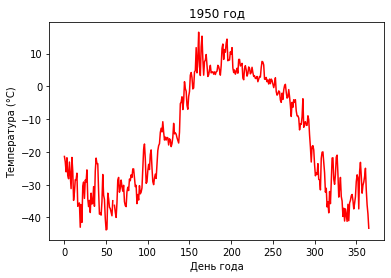

In [8]:
plt.plot(
    range(366),
    wide_temp['1950'],
    color='red'
)
plt.xlabel('День года')
plt.ylabel('Температура (°C)')
plt.title('1950 год')
plt.show()

Видим, что наша температура довольно "угловатая" — есть множество пиков и провалов. Когда мы работаем, например, с древесными данными, на формирование клетки влияет скорее средняя температура за неделю, нежели чем случайная аномальная жара в течение одного дня, поэтому нам бы хотелось нивелировать "болтанку". Для этого есть подход, называемый "скользящим средним".

Скользящее среднее для ряда чисел строется следующим образом: мы берём данные за какой-то период (например, 7 дней или 21 день) и усредняем их. Сохраняем это значение как новый элемент нашего ряда. Затем делаем шаг в один день и снова считаем среднее арифметическое за новый, смещённый период. И так делаем пока данные не закончатся. Новый полученный ряд будет как бы "сглаживать" исходный и будет являться скользящим средним.

Реализовывать алгоитм скользящего среднего с нуля мы не будем, используем для этого встронные методы `.rolling(window).mean()`, где window — это наше окно скользящего среднего. Давайте сгладим нашу температуру 21-дневным скользящим средним:

In [9]:
wide_rolling_1950 = wide_temp['1950'].rolling(window=21).mean()

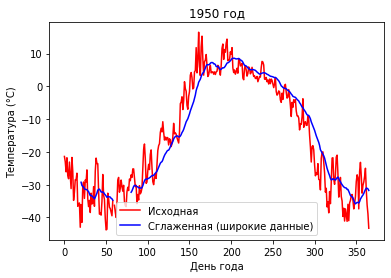

In [10]:
plt.plot(
    range(366),
    wide_temp['1950'],
    color='red',
    label='Исходная'
)
plt.plot(
    range(366),
    wide_rolling_1950,
    color='blue',
    label='Сглаженная (широкие данные)'
)
plt.xlabel('День года')
plt.ylabel('Температура (°C)')
plt.title('1950 год')
plt.legend()
plt.show()

Мы видим, что наша кривая сгладилась, однако мы также видим, что мы потеряли данные с начала года — логично, мы ведь всегда усредняли температуру за 21 день, следовательно, скользящее среднее будет короче нашего исходного ряда на $window-1$ наблюдений.

Однако! У нас ведь имеются данные о температуре за 1949 год. Мы можем взять их! Но как это сделать в широком формате данных? Нам придётся лезть в предыдущую колонку и брать как минимум 20 последних дней прошлого года. А если мы захотим сгладить не 21-дневным скользящим средним, а 7-дневным? 30-дневным?

Тут нам на помощь и приходят длинные данные — в них наша температура уже расположена на одной ленте и "взятие" из предыдущего года произойдёт автоматически:

Посчитаем скользящее среднее для длинных данных:

In [11]:
long_temp['Temp_rolled_21'] = long_temp['Temperature'].rolling(window=21).mean()

Выберем данные за 1950 год:

In [12]:
long_rolling_1950 = long_temp[long_temp['Year']=='1950']
long_rolling_1950.head()

,Month,Day,Year,Temperature,Temp_rolled_21
2196,1,1,1950,-21.4,-25.047619
2197,1,2,1950,-23.0,-24.609524
2198,1,3,1950,-26.1,-24.014286
2199,1,4,1950,-21.8,-23.166667
2200,1,5,1950,-27.2,-23.214286


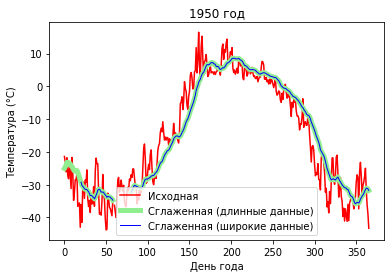

In [13]:
plt.plot(
    range(366),
    wide_temp['1950'],
    color='red',
    label='Исходная'
)
plt.plot(
    range(366),
    long_rolling_1950['Temp_rolled_21'],
    color='lightgreen',
    label='Сглаженная (длинные данные)',
    linewidth='5'
)
plt.plot(
    range(366),
    wide_rolling_1950,
    color='blue',
    label='Сглаженная (широкие данные)',
    linewidth='1'
)
plt.xlabel('День года')
plt.ylabel('Температура (°C)')
plt.title('1950 год')
plt.legend()
plt.show()

Как мы видим, на длинных данных мы с лёгкостью построили скользящую среднюю, включив в неё данные с предыдущего года.

Однако всё ещё можно сделать лучше — если присмотреться, то мы увидим пробел в скользящей средней в районе февраля — это из-за того, что 1950 год не висакосный и в нём нет 29 февраля. И в таблице оно имеет температуру `NaN` (Not a Number — "не число", по факту — пробел в данных):

In [14]:
wide_temp[wide_temp['Month'] == 2][['Day', '1950']]

,Day,1950
31,1,-38.5
32,2,-32.6
33,3,-35.9
34,4,-35.6
35,5,-30.6
36,6,-36.6
37,7,-25.9
38,8,-21.9
39,9,-23.6
40,10,-23.6


И когда мы пытаемся взять среднее арифметическое от 21 чисел, среди которых есть `NaN`, мы получаем тоже `NaN`.

Ну, а ещё наше скользящее среднее как бы "клонится вправо". Давайте исправим это парой параметров метода `.rolling()`:

In [15]:
long_temp['Temp_rolled_21'] = long_temp['Temperature'].rolling(window=21, center=True, min_periods=1).mean()
long_rolling_1950 = long_temp[long_temp['Year']=='1950']

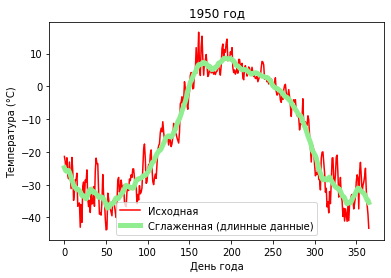

In [16]:
plt.plot(
    range(366),
    wide_temp['1950'],
    color='red',
    label='Исходная'
)
plt.plot(
    range(366),
    long_rolling_1950['Temp_rolled_21'],
    color='lightgreen',
    label='Сглаженная (длинные данные)',
    linewidth='5'
)
plt.xlabel('День года')
plt.ylabel('Температура (°C)')
plt.title('1950 год')
plt.legend()
plt.show()

Вот. Теперь наше сглаживание достаточно хорошо ложится на исходную температуру и не имеет большого пробела в феврале.